# Analysis of Reviews on Olist

🎯 Now that you are familiar with NLP, let's analyze the reviews of Olist.

👇 Run the following cell to load the reviews dataset and install `unidecode`

In [10]:
!pip install -q unidecode

import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ml_olist_nlp_reviews.csv"
df = pd.read_csv(url, low_memory = False)

df.head()


,Unnamed: 0,review_id,length_review,review_score,order_id,product_category_name,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,7bc2406110b926393aa56f80a40eba40,0,4,73fc7af87114b39712e6da79b0a377eb,esporte_lazer,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,1,80e641a11e56f04c1ad469d5645fdfde,0,5,a548910a1c6147796b98fdf73dbeba33,informatica_acessorios,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,2,228ce5500dc1d8e020d8d1322874b6f0,0,5,f9e4b658b201a9f2ecdecbb34bed034b,informatica_acessorios,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,3,e64fb393e7b32834bb789ff8bb30750e,37,5,658677c97b385a9be170737859d3511b,ferramentas_jardim,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,4,f7c4243c7fe1938f181bec41a392bdeb,100,5,8e6bfb81e283fa7e4f11123a3fb894f1,esporte_lazer,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [11]:
df.shape


(98657, 17)

❓ **Question: Analyse the reviews to understand what could be the causes of the bad review scores** ❓

This challenge is not as guided as the previous ones. But here are some questions to ask yourself:

- Are all the reviews relevant ? 
- What about combining the title and the body of a review ?
- What cleaning operations would you apply to the reviews ?

In [12]:
df.info()

df.isnull().sum()

df['review_score'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98657 entries, 0 to 98656
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     98657 non-null  int64 
 1   review_id                      98657 non-null  object
 2   length_review                  98657 non-null  int64 
 3   review_score                   98657 non-null  int64 
 4   order_id                       98657 non-null  object
 5   product_category_name          98657 non-null  object
 6   review_comment_title           11486 non-null  object
 7   review_comment_message         40439 non-null  object
 8   review_creation_date           98657 non-null  object
 9   review_answer_timestamp        98657 non-null  object
 10  customer_id                    98657 non-null  object
 11  order_status                   98657 non-null  object
 12  order_purchase_timestamp       98657 non-null  object
 13  o

5    57328
4    19100
1    10930
3     8191
2     3108
Name: review_score, dtype: int64

In [13]:
import re

translation_dict = {
    'produto errado': 'wrong product',
    'ainda nao': 'not yet',
    'nao entregue': 'not delivered',
    'nao veio': 'did not come',
    'nao gostei': 'did not like it',
    'produto defeito': 'defective product',
    'nao functiona': 'not working',
    'produto diferente': 'different product',
    'pessima qualidade': 'poor quality',
    'veio defeito': 'came defect',
    'veio faltando': 'came missing',
    'veio errado': 'came wrong'
}

def replace_brazilian_expressions(text):
    for key, value in translation_dict.items():
        text = re.sub(fr'\b{re.escape(key)}\b', value, text)
    return text

df['combined_review'] = df['review_comment_title'].fillna('') + ' ' + df['review_comment_message'].fillna('')

df['combined_review'] = df['combined_review'].apply(replace_brazilian_expressions)


In [14]:
df['combined_review'] = df['review_comment_title'].fillna('') + ' ' + df['review_comment_message'].fillna('')

df['cleaned_review'] = df['combined_review'].str.replace('[^a-zA-Z\s]', '').str.lower()

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


/var/folders/v2/bxm8981n3s577m8cmy5ztmr40000gn/T/ipykernel_14260/2981205463.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_review'] = df['combined_review'].str.replace('[^a-zA-Z\s]', '').str.lower()
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reecepalmer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


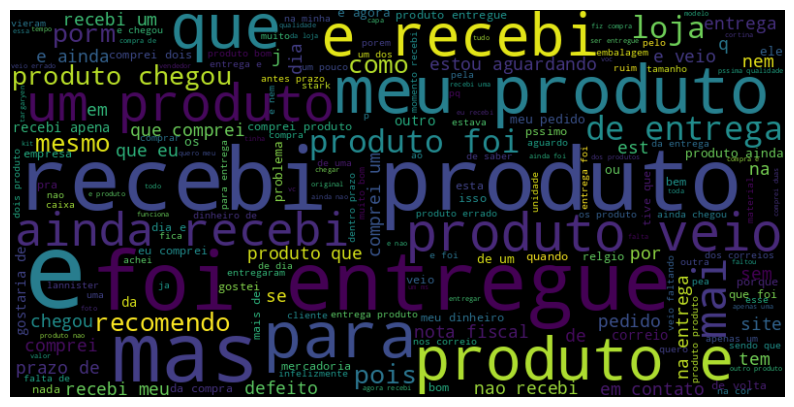

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

bad_reviews = df[df['review_score'] < 4]['cleaned_review'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(bad_reviews)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [16]:
from textblob import TextBlob

df['sentiment'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.85, stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_review'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

for index, topic in enumerate(lda_model.components_):
    print(f'topic #{index + 1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


🇧🇷 Some Brazilian expressions and their translations:

- `producto errado` = wrong product
- `ainda nao` = not yet
- `nao entregue` = not delivered
- `nao veio` = did not come
- `nao gostei` = did not like it
- `produto defeito` = defective product
- `nao functiona` = not working
- `produto diferente` = different product
- `pessima qualidade` = poor quality
- `veio defeito` = came defect
- `veio faltando` = came missing
- `veio errado` = came wrong

🏁 Congratulations. Instead of reading 90K+ reviews, you were able to detect the main reasons of dissatisfactions on Olist.

💾 Don't forget to `git add/commit/push`